In [113]:
import numpy as np
import tensorflow
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [114]:
df = pd.read_csv("2011-capitalbikeshare-tripdata.csv", encoding = "big5")


In [115]:
df.tail()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
1226762,300,2011-12-31 23:41:19,2011-12-31 23:46:20,31201,15th & P St NW,31214,17th & Corcoran St NW,W01459,Member
1226763,387,2011-12-31 23:46:43,2011-12-31 23:53:10,31223,Convention Center / 7th & M St NW,31201,15th & P St NW,W01262,Member
1226764,261,2011-12-31 23:47:27,2011-12-31 23:51:49,31107,Lamont & Mt Pleasant NW,31602,Park Rd & Holmead Pl NW,W00998,Member
1226765,2060,2011-12-31 23:55:12,2012-01-01 00:29:33,31205,21st & I St NW,31222,New York Ave & 15th St NW,W00042,Member
1226766,468,2011-12-31 23:55:56,2012-01-01 00:03:45,31221,18th & M St NW,31111,10th & U St NW,W01319,Member


In [116]:
#計算借出次數並且顯示最多的前五筆資料
station_counts_start = pd.DataFrame(df['Start station number'].value_counts())
station_counts_start.head()

,Start station number
31200,49093
31201,32884
31623,32058
31104,29964
31214,28160


In [117]:
#計算歸還次數並且顯示最多的前五筆資料
station_counts_end = pd.DataFrame(df['End station number'].value_counts())
station_counts_end.head()

,End station number
31200,53910
31201,36638
31623,32252
31214,29103
31104,26248


In [118]:
# 計算單站借出與歸還的次數
station_counts = pd.concat([station_counts_start, station_counts_end], axis=1)
station_counts['total'] = station_counts['Start station number']+station_counts['End station number']
station_counts['ratio'] = (station_counts['total']/station_counts['total'].sum())*100

In [119]:
station_counts.head()

,Start station number,End station number,total,ratio
31000,1171,925,2096,0.085428
31001,3492,3495,6987,0.284773
31002,2883,3407,6290,0.256365
31003,3432,3532,6964,0.283835
31004,1598,1644,3242,0.132136


In [120]:
station_counts_sort = station_counts.sort_values('total', ascending=False)
station_counts_sort.shape

(144, 4)

In [121]:
station_counts_sort.head(70)

,Start station number,End station number,total,ratio
31200,49093,53910,103003,4.198148
31201,32884,36638,69522,2.833545
31623,32058,32252,64310,2.621117
31214,28160,29103,57263,2.333899
31104,29964,26248,56212,2.291063
...,...,...,...,...
31206,6879,6209,13088,0.533435
31401,7349,5678,13027,0.530948
31609,5581,6703,12284,0.500666
31302,7568,4650,12218,0.497976


In [122]:
#假設取出使用率大於1%建立index
# stations_filter = station_counts['total'] > 25000
stations = list(station_counts['total'].head(68).index)
print(stations)

[31000, 31001, 31002, 31003, 31004, 31005, 31006, 31007, 31008, 31009, 31010, 31011, 31012, 31013, 31014, 31015, 31016, 31017, 31018, 31019, 31020, 31021, 31022, 31052, 31100, 31101, 31102, 31103, 31104, 31105, 31106, 31107, 31108, 31109, 31110, 31111, 31112, 31113, 31115, 31116, 31200, 31201, 31202, 31203, 31204, 31205, 31206, 31207, 31208, 31209, 31211, 31212, 31213, 31214, 31215, 31216, 31217, 31218, 31219, 31220, 31221, 31222, 31223, 31224, 31225, 31226, 31227, 31228]


In [123]:
# 提出大於1%的相關站點資料
df_stations = df[(df['Start station number'].isin(stations)) | (df['End station number'].isin(stations))]

In [124]:
df_stations.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual
6,560,2011-01-01 00:35:48,2011-01-01 00:45:09,31203,14th & Rhode Island Ave NW,31201,15th & P St NW,W00766,Member


In [125]:
total_trip_count = df['Duration'].count()
stations_count = df_stations['Duration'].count()
percent = round(stations_count/total_trip_count, 3) * 100
print("total trips：{}, ratio 1%：{}. That's {}%".format(total_trip_count, stations_count, percent))

total trips：1226767, ratio 1%：956957. That's 78.0%


In [126]:
#轉換start date,end date為datetime
df_stations['Start date'] = pd.to_datetime(df['Start date'])
df_stations['End date'] = pd.to_datetime(df['End date'])

C:\Users\User\Anaconda3\envs\tensetflowenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\Anaconda3\envs\tensetflowenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [127]:
#建立資料模型
df_model = df_stations[['Start date', 'End date', 'Start station number','End station number','Member type']]
df_model.info()
df_model.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956957 entries, 1 to 1226766
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Start date            956957 non-null  datetime64[ns]
 1   End date              956957 non-null  datetime64[ns]
 2   Start station number  956957 non-null  int64         
 3   End station number    956957 non-null  int64         
 4   Member type           956957 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 43.8+ MB


,Start date,End date,Start station number,End station number,Member type
1,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,31101,Casual
2,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,31104,Member
3,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,31503,Member


In [128]:
#用Start date建立index
df_model.index = df_model['Start date']
df_model.drop('Start date',axis=1,inplace=True)
df_model.head()

C:\Users\User\Anaconda3\envs\tensetflowenv\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,End date,Start station number,End station number,Member type
Start date,,,,
2011-01-01 00:02:46,2011-01-01 00:08:32,31105,31101,Casual
2011-01-01 00:06:13,2011-01-01 00:15:36,31400,31104,Member
2011-01-01 00:09:21,2011-01-01 00:16:36,31111,31503,Member
2011-01-01 00:28:26,2011-01-01 00:32:19,31104,31106,Casual
2011-01-01 00:35:48,2011-01-01 00:45:09,31203,31201,Member


In [129]:
#分割出星期幾,時間的欄位
df_model['day'] = df_model.index.day_name()
df_model['year'] = df_model.index.map(lambda x:str(x)[:4])
df_model['month'] = df_model.index.map(lambda x:str(x)[5:7])
df_model['hour'] = df_model.index.map(lambda x:str(x)[11:13])
df_model['time'] = df_model.index.map(lambda x:str(x)[11:19])


C:\Users\User\Anaconda3\envs\tensetflowenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\Anaconda3\envs\tensetflowenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\envs\tensetflowenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

KeyboardInterrupt: 

In [130]:
df_model.head()

,End date,Start station number,End station number,Member type,day,year,month,hour
Start date,,,,,,,,
2011-01-01 00:02:46,2011-01-01 00:08:32,31105,31101,Casual,Saturday,2011,01,00
2011-01-01 00:06:13,2011-01-01 00:15:36,31400,31104,Member,Saturday,2011,01,00
2011-01-01 00:09:21,2011-01-01 00:16:36,31111,31503,Member,Saturday,2011,01,00
2011-01-01 00:28:26,2011-01-01 00:32:19,31104,31106,Casual,Saturday,2011,01,00
2011-01-01 00:35:48,2011-01-01 00:45:09,31203,31201,Member,Saturday,2011,01,00


In [131]:
#建立出站星期、時間統整
df_model_end_counts = pd.DataFrame(df_model.groupby(['Start station number', 'day', 'hour'])['year'].count())

In [132]:
df_model_end_counts.head()

year
Start station number day    hour      
31000                Friday 00       1
                            01       1
                            06       6
                            07       2
                            08      10

In [133]:
#重置索引對每列填入欄位
df_model_end_counts.reset_index()

,Start station number,day,hour,year
0,31000,Friday,00,1
1,31000,Friday,01,1
2,31000,Friday,06,6
3,31000,Friday,07,2
4,31000,Friday,08,10
...,...,...,...,...
17636,31805,Sunday,14,2
17637,31805,Sunday,15,2
17638,31805,Tuesday,14,1
17639,31805,Wednesday,09,1


In [167]:
df_model_end_counts.shape

(17641, 1)

In [169]:
#建立歸還的模型(作為未來歸還預測的模型)
end = df_model[df_model['Start station number'].isin(stations)]


In [168]:
end.tail(1995)

,End date,Start station number,End station number,Member type,day,year,month,hour,time_col
Start date,,,,,,,,,
2011-12-30 15:35:13,2011-12-30 15:44:18,31113,31201,Member,Friday,2011,12,15,2011-12-30 15
2011-12-30 15:35:34,2011-12-30 15:43:42,31200,31205,Member,Friday,2011,12,15,2011-12-30 15
2011-12-30 15:35:43,2011-12-30 15:44:27,31115,31107,Member,Friday,2011,12,15,2011-12-30 15
2011-12-30 15:36:11,2011-12-30 15:58:12,31213,31217,Casual,Friday,2011,12,15,2011-12-30 15
2011-12-30 15:36:17,2011-12-30 15:55:14,31225,31624,Member,Friday,2011,12,15,2011-12-30 15
...,...,...,...,...,...,...,...,...,...
2011-12-31 23:41:19,2011-12-31 23:46:20,31201,31214,Member,Saturday,2011,12,23,2011-12-31 23
2011-12-31 23:46:43,2011-12-31 23:53:10,31223,31201,Member,Saturday,2011,12,23,2011-12-31 23
2011-12-31 23:47:27,2011-12-31 23:51:49,31107,31602,Member,Saturday,2011,12,23,2011-12-31 23


In [170]:
end.shape

(737089, 8)

In [135]:
#建立出站星期、時間統整
end['time_col'] = end.index.map(lambda x:str(x)[:13])
end.head(1)

C:\Users\User\Anaconda3\envs\tensetflowenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,End date,Start station number,End station number,Member type,day,year,month,hour,time_col
Start date,,,,,,,,,
2011-01-01 00:02:46,2011-01-01 00:08:32,31105,31101,Casual,Saturday,2011,01,00,2011-01-01 00


In [136]:
#建立時段出站次數
end_model = pd.DataFrame(end.groupby(['Start station number', 'time_col'])['hour'].count())

In [137]:
end_model.head(5)

hour
Start station number time_col           
31000                2011-01-07 09     1
                     2011-01-07 12     1
                     2011-01-08 00     1
                     2011-01-08 14     1
                     2011-01-09 12     2

In [138]:
end_model.rename(columns={'hour':'end_count'}, inplace=True)
end_model.reset_index(inplace=True)
end_model.index = end_model['time_col']

In [139]:
end_model.head(3)

,Start station number,time_col,end_count
time_col,,,
2011-01-07 09,31000,2011-01-07 09,1
2011-01-07 12,31000,2011-01-07 12,1
2011-01-08 00,31000,2011-01-08 00,1


In [140]:
end_model = end_model.merge(end['Member type'], left_index=True, right_index=True)

In [141]:
end_model['date'] = end_model.index.map(lambda x:str(x)[:10])
end_model['year'] = end_model.index.map(lambda x:str(x)[:4])
end_model['month'] = end_model.index.map(lambda x:str(x)[5:7])
end_model['hour'] = end_model.index.map(lambda x:str(x)[11:13])
end_model['day'] = end_model.index.day_name()

In [142]:
end_model.head(10)

,Start station number,time_col,end_count,Member type,date,year,month,hour,day
2011-01-07 16:00:00,31007,2011-01-07 16,1,Member,2011-01-07,2011,01,16,Friday
2011-01-07 16:00:00,31011,2011-01-07 16,1,Member,2011-01-07,2011,01,16,Friday
2011-01-07 16:00:00,31100,2011-01-07 16,3,Member,2011-01-07,2011,01,16,Friday
2011-01-07 16:00:00,31101,2011-01-07 16,1,Member,2011-01-07,2011,01,16,Friday
2011-01-07 16:00:00,31103,2011-01-07 16,1,Member,2011-01-07,2011,01,16,Friday
2011-01-07 16:00:00,31104,2011-01-07 16,2,Member,2011-01-07,2011,01,16,Friday
2011-01-07 16:00:00,31110,2011-01-07 16,2,Member,2011-01-07,2011,01,16,Friday
2011-01-07 16:00:00,31200,2011-01-07 16,4,Member,2011-01-07,2011,01,16,Friday
2011-01-07 16:00:00,31201,2011-01-07 16,1,Member,2011-01-07,2011,01,16,Friday
2011-01-07 16:00:00,31202,2011-01-07 16,1,Member,2011-01-07,2011,01,16,Friday


In [143]:
end_model['time_col'] = pd.to_datetime(end_model['time_col'])
end_model.index = end_model['time_col']
end_model.head(3)

,Start station number,time_col,end_count,Member type,date,year,month,hour,day
time_col,,,,,,,,,
2011-01-07 16:00:00,31007,2011-01-07 16:00:00,1,Member,2011-01-07,2011,01,16,Friday
2011-01-07 16:00:00,31011,2011-01-07 16:00:00,1,Member,2011-01-07,2011,01,16,Friday
2011-01-07 16:00:00,31100,2011-01-07 16:00:00,3,Member,2011-01-07,2011,01,16,Friday


In [144]:
end_model.drop('time_col', axis=1,inplace=True)
end_model.head(1)

,Start station number,end_count,Member type,date,year,month,hour,day
time_col,,,,,,,,
2011-01-07 16:00:00,31007,1,Member,2011-01-07,2011,01,16,Friday


In [145]:
cols = end_model.columns.tolist()

In [146]:
#重新排列
new_cols = ['end_count','Start station number','year','month','hour','day','Member type']
end_model = end_model[new_cols]

In [147]:
end_model.head(3)

,end_count,Start station number,year,month,hour,day,Member type
time_col,,,,,,,
2011-01-07 16:00:00,1,31007,2011,01,16,Friday,Member
2011-01-07 16:00:00,1,31011,2011,01,16,Friday,Member
2011-01-07 16:00:00,3,31100,2011,01,16,Friday,Member


In [172]:
end_model.shape

(7408, 7)

In [148]:
end_model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7408 entries, 2011-01-07 16:00:00 to 2011-12-30 13:00:00
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   end_count             7408 non-null   int64 
 1   Start station number  7408 non-null   int64 
 2   year                  7408 non-null   object
 3   month                 7408 non-null   object
 4   hour                  7408 non-null   object
 5   day                   7408 non-null   object
 6   Member type           7408 non-null   object
dtypes: int64(2), object(5)
memory usage: 463.0+ KB


In [149]:
end_model['Start station number'] = end_model['Start station number'].apply(str)

In [150]:
end_dummies = pd.get_dummies(data=end_model, columns=['Start station number','year','month','hour','day','Member type'])

In [151]:
end_dummies.head(2)

,end_count,Start station number_31000,Start station number_31001,Start station number_31002,Start station number_31003,Start station number_31004,Start station number_31005,Start station number_31006,Start station number_31007,Start station number_31008,...,hour_23,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,Member type_Casual,Member type_Member
time_col,,,,,,,,,,,,,,,,,,,,,
2011-01-07 16:00:00,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2011-01-07 16:00:00,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [152]:
end_dummies.shape

(7408, 112)

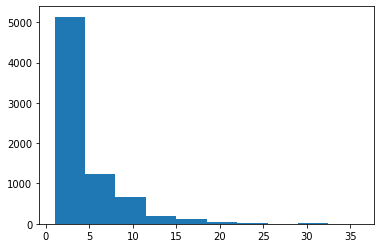

In [153]:
plot.hist(end_dummies['end_count'])
plot.show()

In [154]:
end_dummies['end_count'].skew() #非常歪斜

2.2456961808131095

In [155]:
#取log接近常態分佈
log_count = np.log(end_dummies['end_count']).skew() 
log_count

0.26070077922652046

In [156]:
end_dummies['end_count(log)'] = np.log(end_dummies['end_count'])
end_dummies.head(3)

,end_count,Start station number_31000,Start station number_31001,Start station number_31002,Start station number_31003,Start station number_31004,Start station number_31005,Start station number_31006,Start station number_31007,Start station number_31008,...,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,Member type_Casual,Member type_Member,end_count(log)
time_col,,,,,,,,,,,,,,,,,,,,,
2011-01-07 16:00:00,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0.000000
2011-01-07 16:00:00,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0.000000
2011-01-07 16:00:00,3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1.098612


In [157]:
end_dummies.shape

(7408, 113)

In [173]:
#保留20%的test data
train = end_dummies[:5926]
test = end_dummies[5926:]

In [174]:
y_train = train['end_count(log)']
x_train = train.drop(['end_count','end_count(log)'],axis=1)
y_test = test['end_count(log)']
x_test = test.drop(['end_count','end_count(log)'],axis=1)

In [175]:
x_train.shape

(5926, 111)

In [176]:
x_test.shape

(1482, 111)

In [162]:
#linear regression
# linear = LinearRegression()
# linear.fit(x_train,y_train)
# predicted = linear.predict(x_test)

In [177]:
rf = RandomForestRegressor(n_estimators=15,n_jobs=2)
rf.fit(x_train, y_train)
rf_preds = rf.predict(x_test)

In [178]:
## Random Forset metrics
from sklearn.metrics import median_absolute_error, mean_absolute_error, mean_squared_error, r2_score

# Mean Squared Error 該指標計算的是擬合數據和原始資料對應樣本點的誤差的平方和的均值，其值越小說明擬合效果越好
rf_mse = mean_squared_error(np.e ** y_test, np.e ** rf_preds)

# r2 score 越接近於1說明自變數越能解釋因變數的方差變化，值越小則說明效果越差。
rf_r2 = r2_score(np.e ** y_test, np.e ** rf_preds)

# Mean Absolute Error 用於評估預測結果和真實資料集的接近程度的程度，其值越小說明擬合效果越好
rf_mean_ae = mean_absolute_error(np.e ** y_test, np.e ** rf_preds)

# Median Absolute Error
rf_median_ae = median_absolute_error(np.e ** y_test, np.e ** rf_preds)

In [179]:
print('Mean Squared Error =', rf_mse)
print('r2 =', rf_r2)
print('Mean Absolute Error =', rf_mean_ae)
print('Median Absolute Error =', rf_median_ae)

Mean Squared Error = 9.559537273945182
r2 = 0.13086899089382642
Mean Absolute Error = 2.0572700672085733
Median Absolute Error = 1.3137166436297925


In [ ]:
# time_col=x_test.index
# predsTest = rfModel.predict(x_test)
# submission = pd.DataFrame({
#         "datetime": time_col,
#         "count": [max(0, x) for x in np.exp(predsTest)]
#     })
# submission.to_csv('sharebike_pred.csv', index=False)

In [180]:
rf.score(x_train, y_train)

0.8869610248159724

In [181]:
rf.score(x_test, y_test)

0.1633114947199221